# Introduction


**What?** Persistent model



# What is a persistent model?


- A persistent model is a model that predicts the value at time "t+1" **by using only** the value at time "t".
- **How is this used in practice?** It can be used as a baseline model to judge other models.
- The persistence algorithm is **naive** and is often called the **naive forecast**. It assumes nothing about the
specifics of the time series problem to which it is applied. This is what makes it so easy to understand
and so quick to implement and evaluate.



# Import modules

In [1]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot, rcParams
from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-1-9a0658efcfcb>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Load dataset

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('../datasets/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# Define the Supervised Learning Problem


- Create a lagged representation: given the observation at t, predict the observation at t+1. 
- From a supervised learning perspective, the t column is the input variable, or X, and the t+1 column is the output variable, or y.



In [3]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1'] 
print(dataframe.head(5))

       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


# Train and test sets


- We will keep the first 66% of the observations for training and the remaining 34% for evaluation. 
- Exclude the first row of data with the **NaN** value. 



In [4]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# Persistence algorithm


- We do this using the walk-forward validation method. 
- **No model** training or retraining is required 
- From the plot of the persistence model predictions, it is clear that the model is one-step BEHIND reality.



In [5]:
# walk-forward validation
predictions = list()
for x in test_X:
    # the prediction is simply that of the input (which was already shifted)
    yhat = x
    predictions.append(yhat)

rmse = sqrt(mean_squared_error(test_y, predictions)) 
print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.156


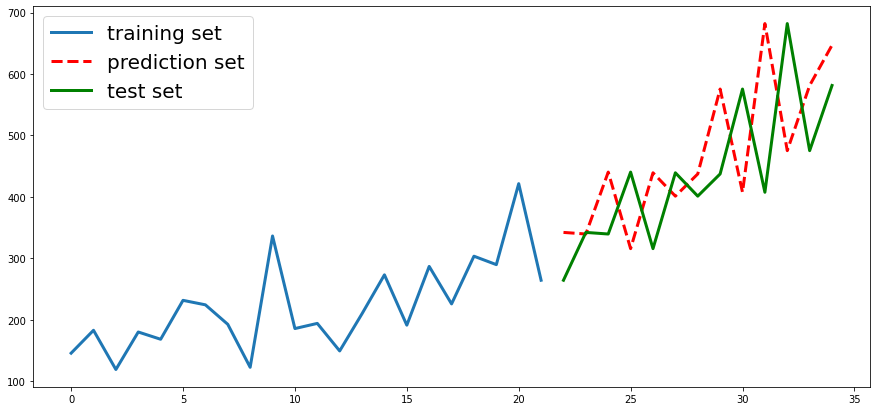

In [6]:
rcParams['figure.figsize'] = 15, 7
pyplot.plot(train_y, lw = 3, label = "training set")
pyplot.plot([None for i in train_y] + [x for x in test_y], 'r--', lw = 3, label = "prediction set") 
pyplot.plot([None for i in train_y] + [x for x in predictions], 'g-', lw = 3, label = "test set") 
pyplot.legend(fontsize = 20)
pyplot.show()

# References


- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

